# Análisis de resultados escolares con reducción de la dimensionalidad y agrupamiento
Esteban Rojas Henao, Sergio Andrés Zambrano, Miguel Angel Rojas 

## Importar librerías

In [28]:
import pandas as pd
import numpy as np

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Lectura de datos

In [30]:
df = pd.read_csv('Archivos/CollegeScorecard.csv')
df.shape

/home/ext4ur/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(7804, 1725)

In [31]:
pd.set_option('display.max_columns', None)
df.head()


UNITID    OPEID  opeid6                               INSTNM        CITY  \
0  100654   100200    1002             Alabama A & M University      Normal   
1  100663   105200    1052  University of Alabama at Birmingham  Birmingham   
2  100690  2503400   25034                   Amridge University  Montgomery   
3  100706   105500    1055  University of Alabama in Huntsville  Huntsville   
4  100724   100500    1005             Alabama State University  Montgomery   

  STABBR         ZIP                                       AccredAgency  \
0     AL       35762  Southern Association of Colleges and Schools C...   
1     AL  35294-0110  Southern Association of Colleges and Schools C...   
2     AL  36117-3553  Southern Association of Colleges and Schools C...   
3     AL       35899  Southern Association of Colleges and Schools C...   
4     AL  36104-0271  Southern Association of Colleges and Schools C...   

                          INSTURL  \
0                   www.aamu.edu/   
1                     www.uab.edu   
2       www.amridgeuniversity.edu   
3                     www.uah.edu   
4  www.alasu.edu/email/index.aspx   

                                              NPCURL  sch_deg  HCM2  main  \
0     galileo.aamu.edu/netpricecalculator/npcalc.htm      NaN     0     1   
1    www.collegeportraits.org/AL/UAB/estimator/agree      NaN     0     1   
2  tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...      NaN     0     1   
3                                    finaid.uah.edu/      NaN     0     1   
4  www.alasu.edu/cost-aid/forms/calculator/index....      NaN     0     1   

   NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  st_fips  region  LOCALE  locale2  \
0          1        3        4        1        1       5    12.0      NaN   
1          1        3        4        1        1       5    12.0      NaN   
2          1        3        4        2        1       5    12.0      NaN   
3          1        3        4        1        1       5    12.0      NaN   
4          1        3        4        1        1       5    12.0      NaN   

   LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  TRIBAL  \
0   34.7834   -86.5685     18.0       9.0      14.0   1.0  0.0    0.0     0.0   
1   33.5022   -86.8092     15.0       8.0      15.0   0.0  0.0    0.0     0.0   
2   32.3626   -86.1740     21.0       6.0       6.0   0.0  0.0    0.0     0.0   
3   34.7228   -86.6384     15.0       8.0      12.0   0.0  0.0    0.0     0.0   
4   32.3643   -86.2957     18.0       9.0      13.0   1.0  0.0    0.0     0.0   

   AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  ADM_RATE_ALL  \
0      0.0  0.0    0.0      0.0        0.0       NaN    0.8989        0.8989   
1      0.0  0.0    0.0      0.0        0.0       NaN    0.8673        0.8673   
2      0.0  0.0    0.0      0.0        0.0      74.0       NaN           NaN   
3      0.0  0.0    0.0      0.0        0.0       NaN    0.8062        0.8062   
4      0.0  0.0    0.0      0.0        0.0       NaN    0.5125        0.5125   

   SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  SATVRMID  SATMTMID  \
0    370.0    450.0    350.0    450.0      NaN      NaN     410.0     400.0   
1    520.0    640.0    520.0    650.0      NaN      NaN     580.0     585.0   
2      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
3    510.0    640.0    510.0    650.0      NaN      NaN     575.0     580.0   
4    380.0    480.0    370.0    480.0      NaN      NaN     430.0     425.0   

   SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  ACTMT75  ACTWR25  \
0       NaN     15.0     19.0     14.0     19.0     15.0     18.0      NaN   
1       NaN     22.0     28.0     22.0     29.0     20.0     26.0      NaN   
2       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       NaN     23.0     29.0     22.0     30.0     22.0     28.0      NaN   
4       NaN     15.0     19.0     14.0     20.0     15.0     18.0      NaN   

   ACTWR75  ACTC

Se borran las columnas que están nulas, que no aportan información relevante y se combinan algunas.

In [32]:
null_columns = []
for column in df.columns:
    
    if df[column].isnull().all():
        
        null_columns.append(column)
        
df.drop(columns=null_columns, inplace=True)

In [33]:
  #  print(df.columns.to_list())

borrar = ['UNITID', 'OPEID', 'opeid6', 'INSTURL', 'NPCURL', 'LATITUDE', 'LONGITUDE', 'ADM_RATE_ALL',
          'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75',
          'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75',
          'NPT41_PROG', 'NPT42_PROG', 'NPT43_PROG', 'NPT44_PROG', 'NPT45_PROG',
          'NPT41_OTHER', 'NPT42_OTHER', 'NPT43_OTHER', 'NPT44_OTHER', 'NPT45_OTHER',
          'NPT4_048_PUB', 'NPT4_048_PRIV', 'NPT4_048_PROG', 'NPT4_048_OTHER',
          'NPT4_3075_PUB', 'NPT4_3075_PRIV', 'NPT4_75UP_PUB', 'NPT4_75UP_PRIV',
          'NPT4_3075_PROG', 'NPT4_3075_OTHER', 'NPT4_75UP_PROG', 'NPT4_75UP_OTHER',
          'SAT_AVG_ALL', 'NUM4_PROG', 'NUM4_OTHER'
          'STABBR', # Duplicada por st_fips
          'locale2', # Todo nulo
          
          'st_fips','region', 'LOCALE', # Locate opcional
          'CURROPER',
          'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 
          'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 
          'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 
          'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 
          'PCIP52', 'PCIP54', 'CIP01CERT1', 'CIP01CERT2', 'CIP01ASSOC', 'CIP01CERT4', 'CIP01BACHL', 
          'CIP03CERT1', 'CIP03CERT2', 'CIP03ASSOC', 'CIP03CERT4', 'CIP03BACHL', 'CIP04CERT1', 'CIP04CERT2', 
          'CIP04ASSOC', 'CIP04CERT4', 'CIP04BACHL', 'CIP05CERT1', 'CIP05CERT2', 'CIP05ASSOC', 'CIP05CERT4', 
          'CIP05BACHL', 'CIP09CERT1', 'CIP09CERT2', 'CIP09ASSOC', 'CIP09CERT4', 'CIP09BACHL', 'CIP10CERT1', 
          'CIP10CERT2', 'CIP10ASSOC', 'CIP10CERT4', 'CIP10BACHL', 'CIP11CERT1', 'CIP11CERT2', 'CIP11ASSOC', 
          'CIP11CERT4', 'CIP11BACHL', 'CIP12CERT1', 'CIP12CERT2', 'CIP12ASSOC', 'CIP12CERT4', 'CIP12BACHL', 
          'CIP13CERT1', 'CIP13CERT2', 'CIP13ASSOC', 'CIP13CERT4', 'CIP13BACHL', 'CIP14CERT1', 'CIP14CERT2', 
          'CIP14ASSOC', 'CIP14CERT4', 'CIP14BACHL', 'CIP15CERT1', 'CIP15CERT2', 'CIP15ASSOC', 'CIP15CERT4', 
          'CIP15BACHL', 'CIP16CERT1', 'CIP16CERT2', 'CIP16ASSOC', 'CIP16CERT4', 'CIP16BACHL', 'CIP19CERT1', 
          'CIP19CERT2', 'CIP19ASSOC', 'CIP19CERT4', 'CIP19BACHL', 'CIP22CERT1', 'CIP22CERT2', 'CIP22ASSOC', 
          'CIP22CERT4', 'CIP22BACHL', 'CIP23CERT1', 'CIP23CERT2', 'CIP23ASSOC', 'CIP23CERT4', 'CIP23BACHL', 
          'CIP24CERT1', 'CIP24CERT2', 'CIP24ASSOC', 'CIP24CERT4', 'CIP24BACHL', 'CIP25CERT1', 'CIP25CERT2', 
          'CIP25ASSOC', 'CIP25CERT4', 'CIP25BACHL', 'CIP26CERT1', 'CIP26CERT2', 'CIP26ASSOC', 'CIP26CERT4', 
          'CIP26BACHL', 'CIP27CERT1', 'CIP27CERT2', 'CIP27ASSOC', 'CIP27CERT4', 'CIP27BACHL', 'CIP29CERT1', 
          'CIP29CERT2', 'CIP29ASSOC', 'CIP29CERT4', 'CIP29BACHL', 'CIP30CERT1', 'CIP30CERT2', 'CIP30ASSOC', 
          'CIP30CERT4', 'CIP30BACHL', 'CIP31CERT1', 'CIP31CERT2', 'CIP31ASSOC', 'CIP31CERT4', 'CIP31BACHL', 
          'CIP38CERT1', 'CIP38CERT2', 'CIP38ASSOC', 'CIP38CERT4', 'CIP38BACHL', 'CIP39CERT1', 'CIP39CERT2', 
          'CIP39ASSOC', 'CIP39CERT4', 'CIP39BACHL', 'CIP40CERT1', 'CIP40CERT2', 'CIP40ASSOC', 'CIP40CERT4', 
          'CIP40BACHL', 'CIP41CERT1', 'CIP41CERT2', 'CIP41ASSOC', 'CIP41CERT4', 'CIP41BACHL', 'CIP42CERT1', 
          'CIP42CERT2', 'CIP42ASSOC', 'CIP42CERT4', 'CIP42BACHL', 'CIP43CERT1', 'CIP43CERT2', 'CIP43ASSOC', 
          'CIP43CERT4', 'CIP43BACHL', 'CIP44CERT1', 'CIP44CERT2', 'CIP44ASSOC', 'CIP44CERT4', 'CIP44BACHL', 
          'CIP45CERT1', 'CIP45CERT2', 'CIP45ASSOC', 'CIP45CERT4', 'CIP45BACHL', 'CIP46CERT1', 'CIP46CERT2', 
          'CIP46ASSOC', 'CIP46CERT4', 'CIP46BACHL', 'CIP47CERT1', 'CIP47CERT2', 'CIP47ASSOC', 'CIP47CERT4', 
          'CIP47BACHL', 'CIP48CERT1', 'CIP48CERT2', 'CIP48ASSOC', 'CIP48CERT4', 'CIP48BACHL', 'CIP49CERT1', 
          'CIP49CERT2', 'CIP49ASSOC', 'CIP49CERT4', 'CIP49BACHL', 'CIP50CERT1', 'CIP50CERT2', 'CIP50ASSOC', 
          'CIP50CERT4', 'CIP50BACHL', 'CIP51CERT1', 'CIP51CERT2', 'CIP51ASSOC', 'CIP51CERT4', 'CIP51BACHL', 
          'CIP52CERT1', 'CIP52CERT2', 'CIP52ASSOC', 'CIP52CERT4', 'CIP52BACHL', 'CIP54CERT1', 'CIP54CERT2', 
          'CIP54ASSOC', 'CIP54CERT4', 'CIP54BACHL', #opcional PCIP01 - CIP54BACHL
          'RPY_3YR_RT', 'DEP_STAT_PCT_IND', 'DEBT_N', 'DEP_STAT_N'
          ]

convertir = ['MENONLY', 'WOMENONLY', # -> Columna ___ 0 mixto, 1 menonly, 2 womenonly
             'NPT4_PUB', 'NPT4_PRIV', # -> Columna ___ Average Net Price
             'NUM4_PUB', 'NUM4_PRIV', # -> Columna ___ Number of title 4 students
             'NPT41_PUB', 'NPT41_PRIV', # -> Columna ___ Average net price for $0-$30,000 family income
             'NPT42_PUB', 'NPT42_PRIV', # -> Columna ___ Average net price for $30,001-$48,000 family income
             'NPT43_PUB', 'NPT43_PRIV', # -> Columna ___ Average net price for $48,001-$75,000 family income
             'NPT44_PUB', 'NPT44_PRIV', # -> Columna ___ Average net price for $75,001-$110,000 family income
             'NPT45_PUB', 'NPT45_PRIV', # -> Columna ___ Average net price for $110,000+ family income
             'NUM41_PUB', 'NUM41_PRIV', # Columna -> Number of Title IV students, $0-$30,000 family income
             'NUM42_PUB', 'NUM42_PRIV', # Columna -> Number of Title IV students, $30,001-$48,000 family income
             'NUM43_PUB', 'NUM43_PRIV', # Columna -> Number of Title IV students, $48,001-$75,000 family income
             'NUM44_PUB', 'NUM44_PRIV', # Columna -> Number of Title IV students, $75,001-$110,000 family income
             'NUM45_PUB', 'NUM45_PRIV', # Columna -> Number of Title IV students, $110,000+ family income
             ]

df.drop(columns=borrar, errors='ignore', inplace=True)

print(len(df.columns))

286


In [34]:
for i in range(0, len(convertir), 2):
    
    print(convertir[i], df[convertir[i]].loc[~df[convertir[i+1]].isna()].drop_duplicates().to_list(), end=' || ')
    print(convertir[i+1], df[convertir[i+1]].loc[~df[convertir[i]].isna()].drop_duplicates().to_list())

MENONLY [0.0, 1.0] || WOMENONLY [0.0, 1.0]
NPT4_PUB [nan] || NPT4_PRIV [nan]
NUM4_PUB [nan] || NUM4_PRIV [nan]
NPT41_PUB [nan] || NPT41_PRIV [nan]
NPT42_PUB [nan] || NPT42_PRIV [nan]
NPT43_PUB [nan] || NPT43_PRIV [nan]
NPT44_PUB [nan] || NPT44_PRIV [nan]
NPT45_PUB [nan] || NPT45_PRIV [nan]
NUM41_PUB [nan] || NUM41_PRIV [nan]
NUM42_PUB [nan] || NUM42_PRIV [nan]
NUM43_PUB [nan] || NUM43_PRIV [nan]
NUM44_PUB [nan] || NUM44_PRIV [nan]
NUM45_PUB [nan] || NUM45_PRIV [nan]


In [35]:
df[convertir] = df[convertir].fillna(0)

df.loc[df['MENONLY'].eq(1), 'type'] = 1
df.loc[df['WOMENONLY'].eq(1), 'type'] = 2
df['type'] = df['type'].fillna(0)

df['NPT4'] = df['NPT4_PUB'] + df['NPT4_PRIV']
df['NUM4'] = df['NUM4_PUB'] + df['NUM4_PRIV']
df['NPT41'] = df['NPT41_PUB'] + df['NPT41_PRIV']
df['NPT42'] = df['NPT42_PUB'] + df['NPT42_PRIV']
df['NPT43'] = df['NPT43_PUB'] + df['NPT43_PRIV']
df['NPT44'] = df['NPT44_PUB'] + df['NPT44_PRIV']
df['NPT45'] = df['NPT45_PUB'] + df['NPT45_PRIV']
df['NUM41'] = df['NUM41_PUB'] + df['NUM41_PRIV']
df['NUM42'] = df['NUM42_PUB'] + df['NUM42_PRIV']
df['NUM43'] = df['NUM43_PUB'] + df['NUM43_PRIV']
df['NUM44'] = df['NUM44_PUB'] + df['NUM44_PRIV']
df['NUM45'] = df['NUM45_PUB'] + df['NUM45_PRIV']

df.drop(columns=convertir, errors='ignore', inplace=True)

In [36]:
datos = []
lot_null_columns = []
for column in df.columns:
    
    total = df[column].isna().sum()
    
    if total >= 1000:
        
        lot_null_columns.append(column)
        
        if total >= 7000:
            datos.append({'column': column, 'total': total, 'group': 7000})
        elif total >= 6000:
            datos.append({'column': column, 'total': total, 'group': 6000})
        elif total >= 5000:
            datos.append({'column': column, 'total': total, 'group': 5000})
        elif total >= 4000:
            datos.append({'column': column, 'total': total, 'group': 4000})
        elif total >= 3000:
            datos.append({'column': column, 'total': total, 'group': 3000})
        elif total >= 2000:
            datos.append({'column': column, 'total': total, 'group': 2000})
        elif total >= 1000:
            datos.append({'column': column, 'total': total, 'group': 1000})
            
df.drop(columns=lot_null_columns, inplace=True)


In [37]:
print(df.columns)
print(df.columns.to_list())

Index(['INSTNM', 'CITY', 'STABBR', 'ZIP', 'HCM2', 'main', 'NUMBRANCH',
       'PREDDEG', 'HIGHDEG', 'CONTROL',
       ...
       'NPT41', 'NPT42', 'NPT43', 'NPT44', 'NPT45', 'NUM41', 'NUM42', 'NUM43',
       'NUM44', 'NUM45'],
      dtype='object', length=141)
['INSTNM', 'CITY', 'STABBR', 'ZIP', 'HCM2', 'main', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'DISTANCEONLY', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'TUITFTE', 'INEXPFTE', 'PCTPELL', 'PCTFLOAN', 'UG25abv', 'CDR3', 'INC_PCT_LO', 'DEP_INC_PCT_LO', 'IND_INC_PCT_LO', 'PAR_ED_PCT_1STGEN', 'INC_PCT_M1', 'INC_PCT_M2', 'INC_PCT_H1', 'INC_PCT_H2', 'DEP_INC_PCT_M1', 'DEP_INC_PCT_M2', 'DEP_INC_PCT_H1', 'DEP_INC_PCT_H2', 'IND_INC_PCT_M1', 'IND_INC_PCT_M2', 'IND_INC_PCT_H1', 'IND_INC_PCT_H2', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS', 'APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3'

In [38]:
categoric = df.nunique()[df.nunique()<=10]
df.drop(columns=categoric.index, inplace=True)

In [39]:
null_val= df.isnull().sum()[df.isnull().sum()>0]
null_val.count()

110

In [40]:
df = df.replace('PrivacySuppressed', np.nan)
col= null_val.index
v=0
for i in col:
    medians= df[i].median()
    df[i]= df[i].fillna(value=medians)

In [41]:
df.drop(columns=['INSTNM', 'CITY', 'STABBR', 'ZIP'], inplace=True)

In [42]:
df.shape

(7804, 123)

Quedan 123 columnas o variables.

In [43]:
df.to_csv('Archivos/data.csv', index=False)

In [44]:
## Agrupamiento de instituciones

In [45]:
X = df.values
pca = PCA(n_components=123)
pca_fit=pca.fit(X)
reduced_X = pca_fit.transform(X)

Vamos a ver el número de componentes óptimo

(-1.0, 15.0)

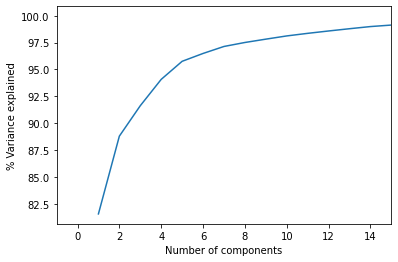

In [46]:
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(range(1,124), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')
plt.xlim(-1,15)

Vemos que lo óptimo serían 5 componentes

In [47]:
pca = PCA(n_components=5)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

In [48]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(reduced_X)

# Generating the standardized values 
x_scaled = PredictorScalerFit.transform(reduced_X)
df2 = pd.DataFrame(x_scaled)
df2.columns=['PC1','PC2','PC3','PC4', 'PC5']
df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.123024,0.796823,0.456943,-1.230180,2.852201
1,-0.075993,1.035283,-0.128291,-0.540431,0.396526
2,-0.195126,-0.350405,-0.234867,-1.127702,0.903871
3,-0.141056,1.240559,-0.183388,-0.266048,0.683652
4,-0.089346,0.277472,0.387924,-1.267341,2.218665


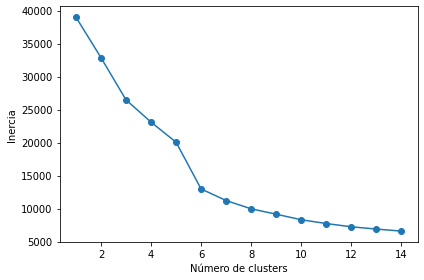

In [49]:
# Encontrando el mejor número de clusters casados en el valor de inercia
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []

valores = df2.values
for i in range(1, 15):
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(valores)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 15), inertiaValue, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.tight_layout()
plt.show()

En este caso vemos que el número de clusters recomendado es 6

In [50]:
km = KMeans(n_clusters= 6, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

predictedCluster = km.fit_predict(valores)
print(predictedCluster)
print('Inertia:', km.inertia_)

[3 4 3 ... 0 0 0]
Inertia: 12650.233708131556


In [51]:
df2['PredictedClusterID']=predictedCluster
df2.head()

,PC1,PC2,PC3,PC4,PC5,PredictedClusterID
0,-0.123024,0.796823,0.456943,-1.230180,2.852201,3
1,-0.075993,1.035283,-0.128291,-0.540431,0.396526,4
2,-0.195126,-0.350405,-0.234867,-1.127702,0.903871,3
3,-0.141056,1.240559,-0.183388,-0.266048,0.683652,4
4,-0.089346,0.277472,0.387924,-1.267341,2.218665,3


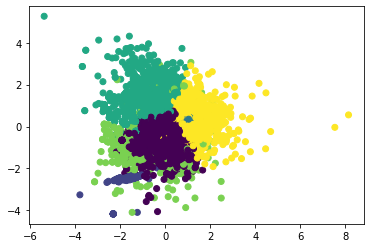

In [52]:
%matplotlib inline
plt.scatter(x=df2['PC4'], y=df2['PC5'], c=df2['PredictedClusterID'])

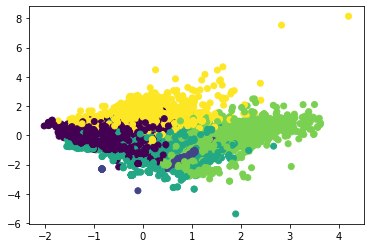

In [53]:
%matplotlib inline
plt.scatter(x=df2['PC2'], y=df2['PC4'], c=df2['PredictedClusterID'])